In [6]:
from google.colab import files
uploaded = files.upload()
from google.colab import files
uploaded = files.upload()
from google.colab import files
uploaded = files.upload()

Saving diabetes_binary_health_indicators_BRFSS2015.csv to diabetes_binary_health_indicators_BRFSS2015 (1).csv


Saving diabetes_binary_5050split_health_indicators_BRFSS2015.csv to diabetes_binary_5050split_health_indicators_BRFSS2015 (1).csv


Saving diabetes_012_health_indicators_BRFSS2015.csv to diabetes_012_health_indicators_BRFSS2015 (1).csv


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

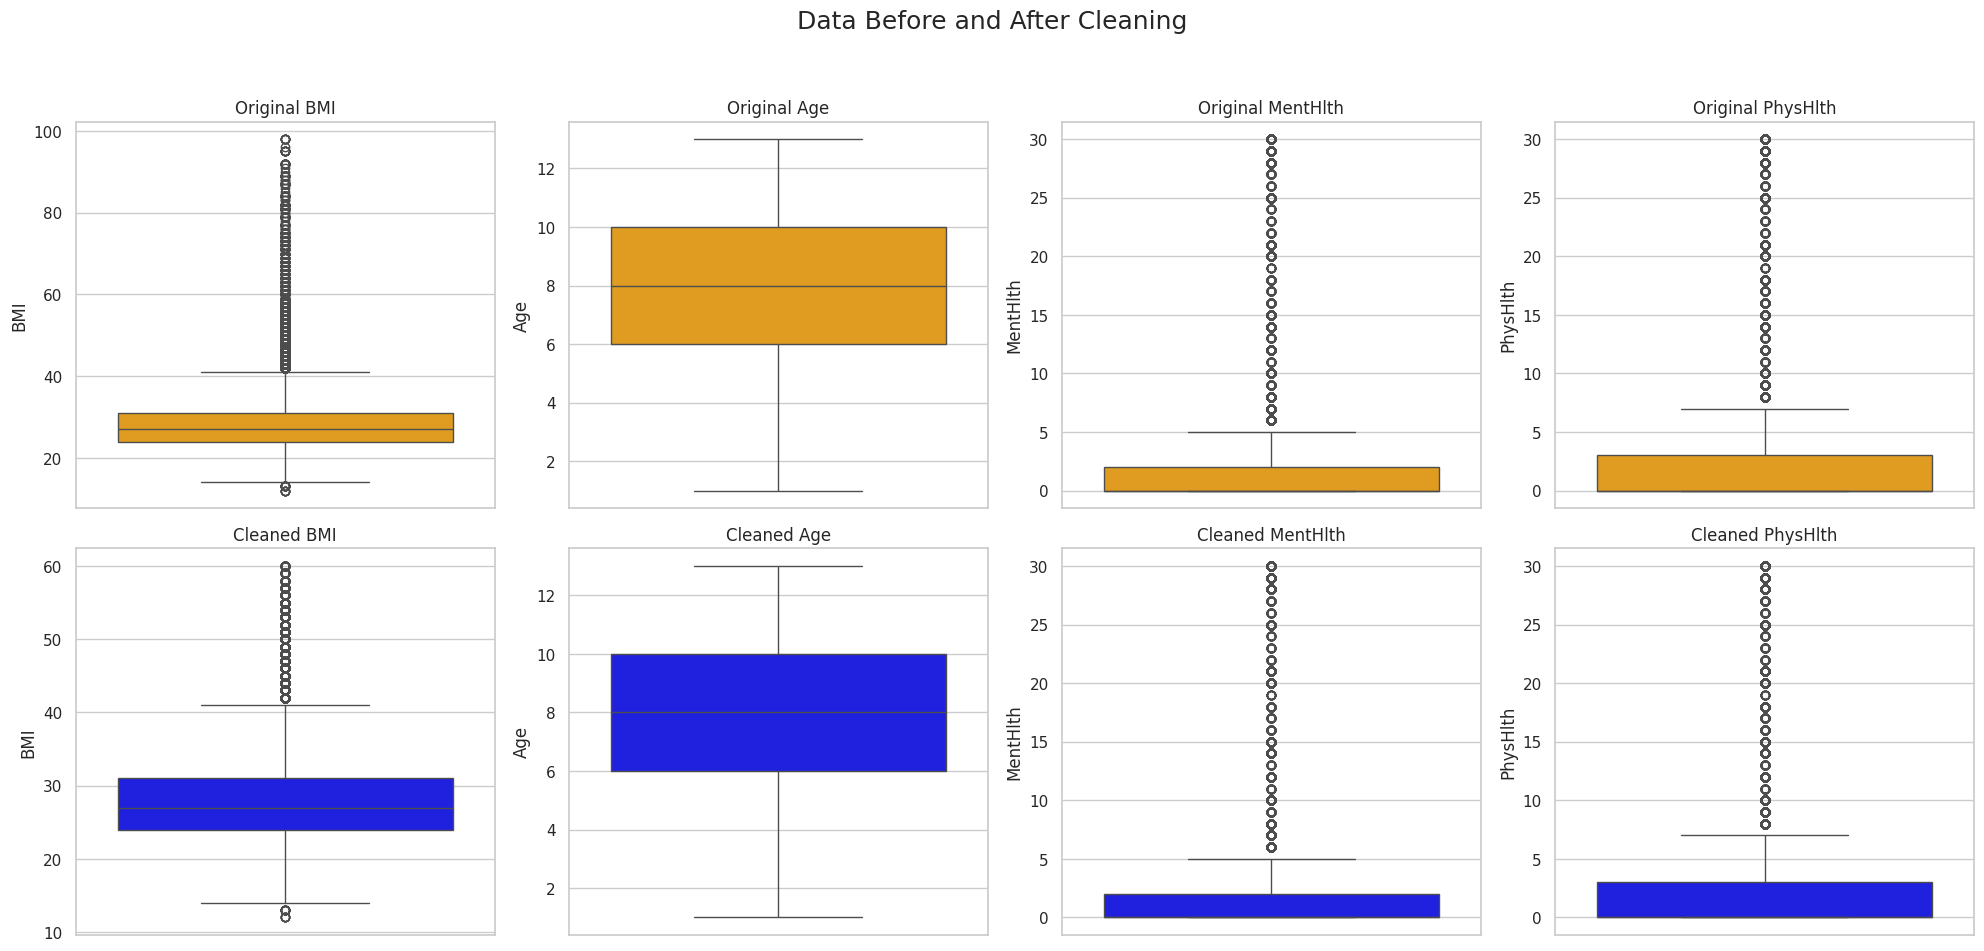

In [24]:
#boxplot
df_before_cleaning = df.copy()
df_after_cleaning = df[
    (df['BMI'] >= 10) & (df['BMI'] <= 60) &
    (df['MentHlth'] <= 30) & (df['PhysHlth'] <= 30)]
features = ['BMI', 'Age', 'MentHlth', 'PhysHlth']
fig, axes = plt.subplots(2, len(features), figsize=(5 * len(features), 10))
fig.suptitle('Data Before and After Cleaning', fontsize=18)

for i, feature in enumerate(features):
    sns.boxplot(y=df_before_cleaning[feature], ax=axes[0, i], color='orange')
    axes[0, i].set_title(f'Original {feature}')
    sns.boxplot(y=df_after_cleaning[feature], ax=axes[1, i], color='blue')
    axes[1, i].set_title(f'Cleaned {feature}')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

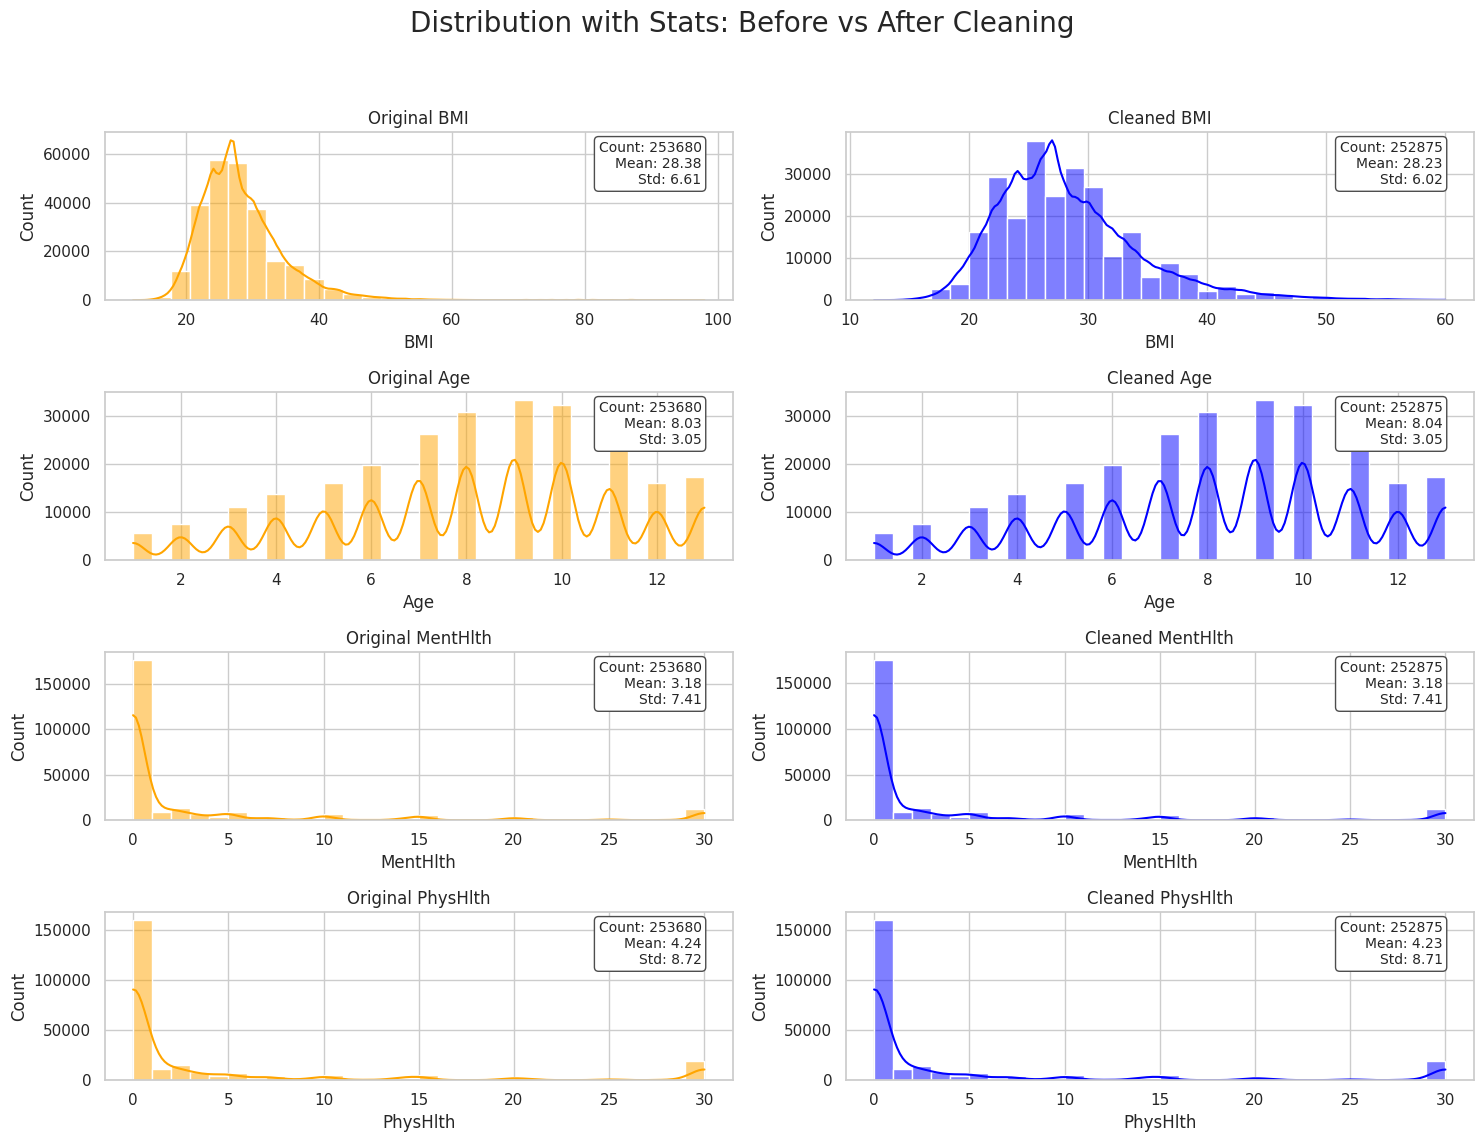

In [26]:
#Histogram
filename = list(uploaded.keys())[0]
df = pd.read_csv(filename)
df_before_cleaning = df.copy()
df_after_cleaning = df[
    (df['BMI'] >= 10) & (df['BMI'] <= 60) &
    (df['MentHlth'] <= 30) & (df['PhysHlth'] <= 30)]
features = ['BMI', 'Age', 'MentHlth', 'PhysHlth']
fig, axes = plt.subplots(len(features), 2, figsize=(15, 12))
fig.suptitle('Distribution with Stats: Before vs After Cleaning', fontsize=20)

def annotate_stats(ax, series):
    stats_text = f"Count: {series.count()}\nMean: {series.mean():.2f}\nStd: {series.std():.2f}"
    ax.text(0.95, 0.95, stats_text,
            verticalalignment='top', horizontalalignment='right',
            transform=ax.transAxes,
            fontsize=10, bbox=dict(boxstyle="round", fc="w", ec="0.3"))

for i, feature in enumerate(features):
    sns.histplot(df_before_cleaning[feature], bins=30, kde=True, ax=axes[i, 0], color='orange')
    axes[i, 0].set_title(f'Original {feature}')
    annotate_stats(axes[i, 0], df_before_cleaning[feature])
    sns.histplot(df_after_cleaning[feature], bins=30, kde=True, ax=axes[i, 1], color='blue')
    axes[i, 1].set_title(f'Cleaned {feature}')
    annotate_stats(axes[i, 1], df_after_cleaning[feature])
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

<ipython-input-27-d27e261ebed2>:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
<ipython-input-27-d27e261ebed2>:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
<ipython-input-27-d27e261ebed2>:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
<ipython-input-27-d27e261ebed2>:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


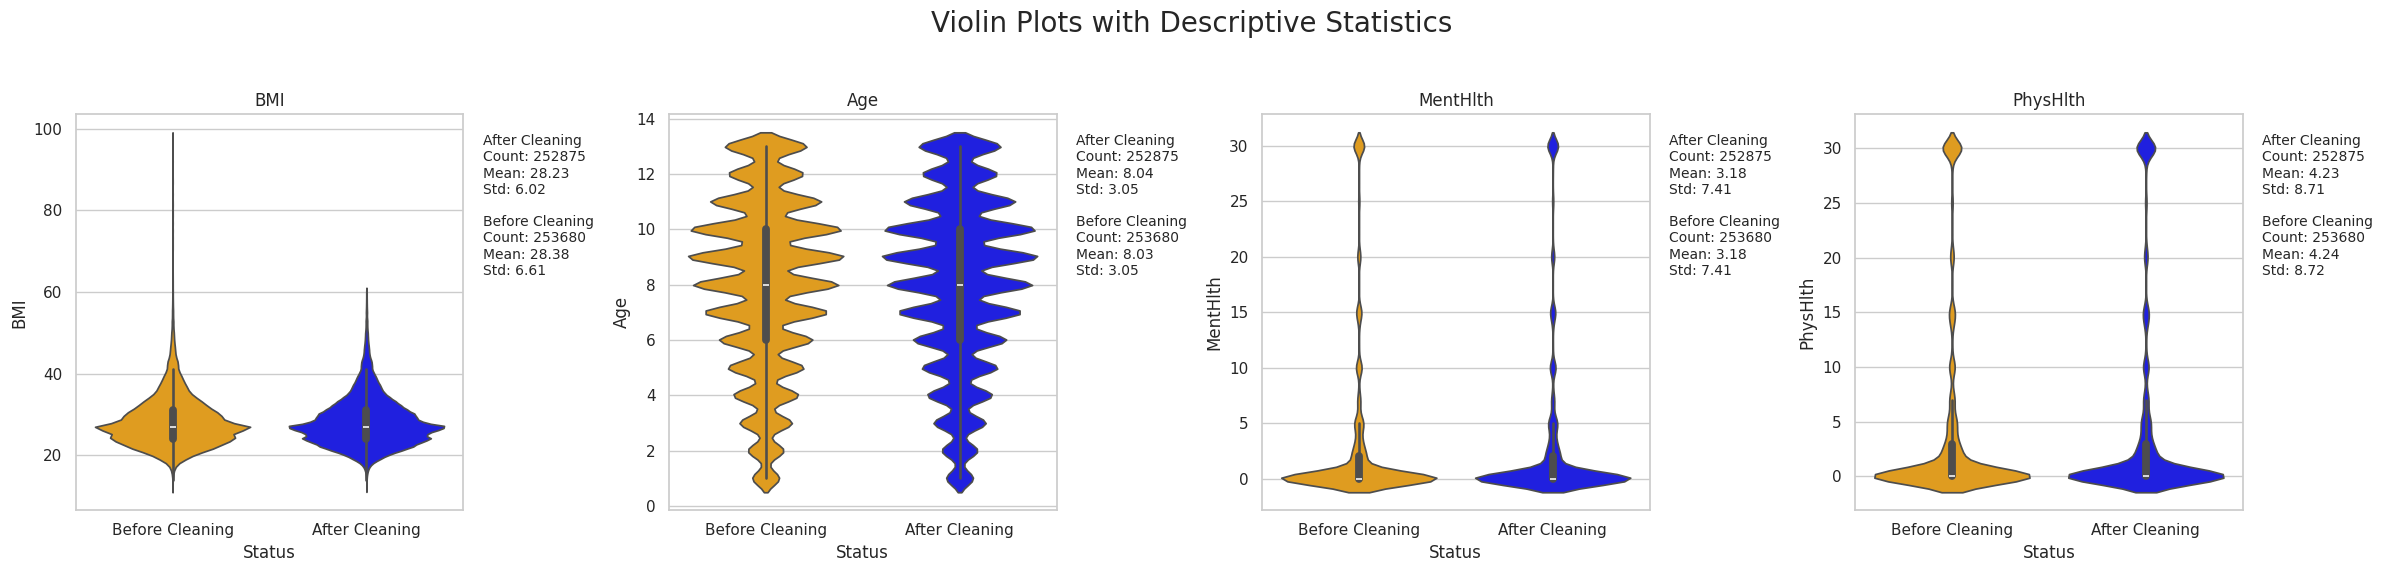

In [27]:
#distribution
filename = list(uploaded.keys())[0]
df = pd.read_csv(filename)
df_before_cleaning = df.copy()
df_after_cleaning = df[
    (df['BMI'] >= 10) & (df['BMI'] <= 60) &
    (df['MentHlth'] <= 30) & (df['PhysHlth'] <= 30)]
features = ['BMI', 'Age', 'MentHlth', 'PhysHlth']

df_before_v = df_before_cleaning[features].copy()
df_before_v['Status'] = 'Before Cleaning'
df_after_v = df_after_cleaning[features].copy()
df_after_v['Status'] = 'After Cleaning'
df_combined = pd.concat([df_before_v, df_after_v])
fig, axes = plt.subplots(1, len(features), figsize=(6 * len(features), 6))
fig.suptitle("Violin Plots with Descriptive Statistics", fontsize=20)

def add_stats(ax, data, feature):
    stats = data.groupby('Status')[feature].agg(['count', 'mean', 'std'])
    text = ""
    for status in stats.index:
        row = stats.loc[status]
        text += f"{status}\nCount: {int(row['count'])}\nMean: {row['mean']:.2f}\nStd: {row['std']:.2f}\n\n"
    ax.text(1.05, 0.95, text.strip(), transform=ax.transAxes,
            verticalalignment='top', horizontalalignment='left',
            fontsize=10, bbox=dict(boxstyle="round", facecolor="white", alpha=0.6))

for i, feature in enumerate(features):
    sns.violinplot(
        data=df_combined, x='Status', y=feature, ax=axes[i],
        palette={'Before Cleaning': 'orange', 'After Cleaning': 'blue'})
    axes[i].set_title(feature)
    add_stats(axes[i], df_combined, feature)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()




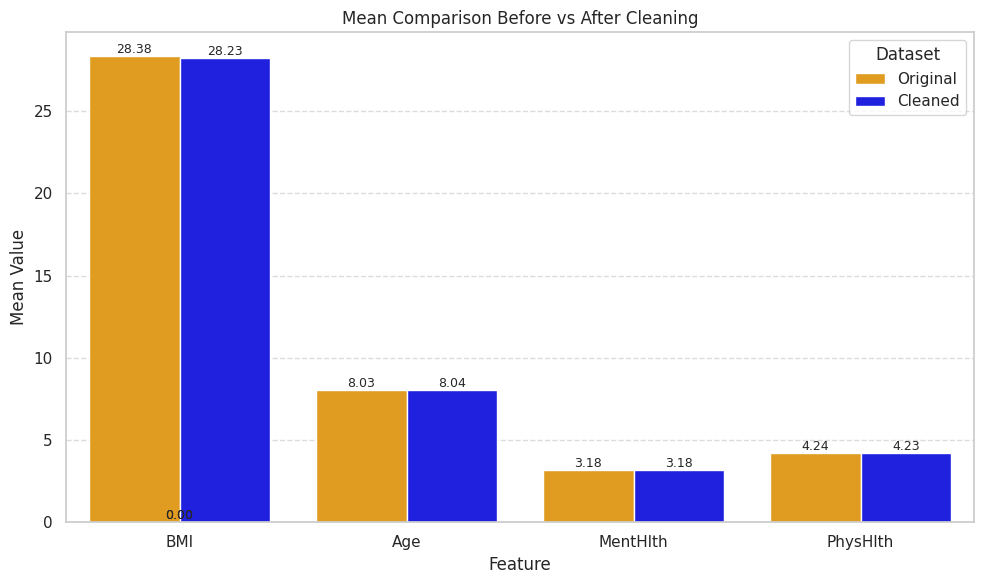

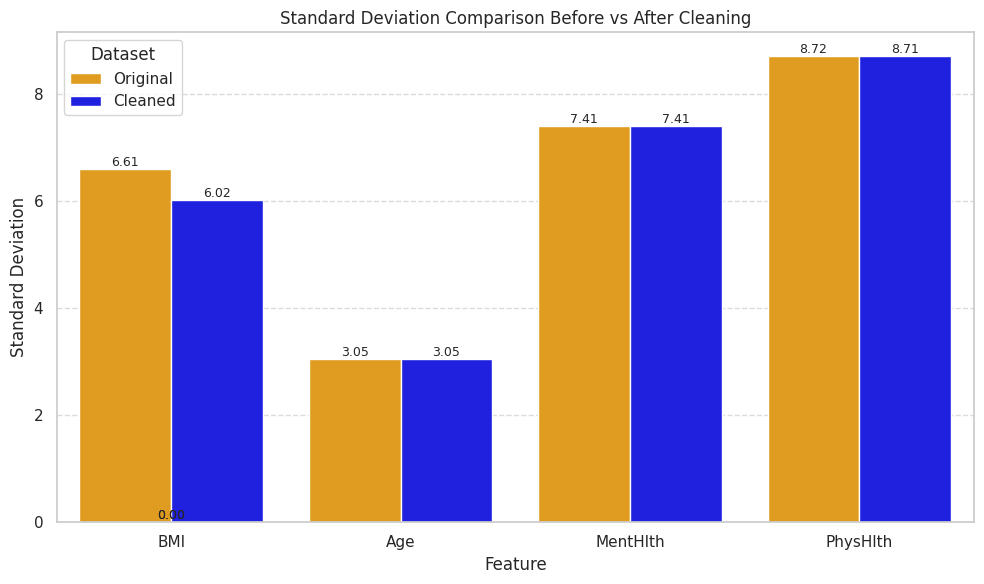

In [28]:
#BarPlots
filename = list(uploaded.keys())[0]
df = pd.read_csv(filename)
df_before_cleaning = df.copy()
df_after_cleaning = df[
    (df['BMI'] >= 10) & (df['BMI'] <= 60) &
    (df['MentHlth'] <= 30) & (df['PhysHlth'] <= 30)]
features = ['BMI', 'Age', 'MentHlth', 'PhysHlth']
stats_data = {
    'Feature': [],
    'Dataset': [],
    'Mean': [],
    'Std': [],
    'Count': []}

for feature in features:
    stats_data['Feature'].append(feature)
    stats_data['Dataset'].append('Original')
    stats_data['Mean'].append(df_before_cleaning[feature].mean())
    stats_data['Std'].append(df_before_cleaning[feature].std())
    stats_data['Count'].append(df_before_cleaning[feature].count())
    stats_data['Feature'].append(feature)
    stats_data['Dataset'].append('Cleaned')
    stats_data['Mean'].append(df_after_cleaning[feature].mean())
    stats_data['Std'].append(df_after_cleaning[feature].std())
    stats_data['Count'].append(df_after_cleaning[feature].count())
df_stats = pd.DataFrame(stats_data)

def plot_bar_with_labels(df, stat_col, title, ylabel):
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(data=df, x='Feature', y=stat_col, hue='Dataset',
                     palette={'Original': 'orange', 'Cleaned': 'blue'})
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height:.2f}',
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', fontsize=9)
    plt.title(title)
    plt.ylabel(ylabel)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

plot_bar_with_labels(df_stats, 'Mean', 'Mean Comparison Before vs After Cleaning', 'Mean Value')
plot_bar_with_labels(df_stats, 'Std', 'Standard Deviation Comparison Before vs After Cleaning', 'Standard Deviation')


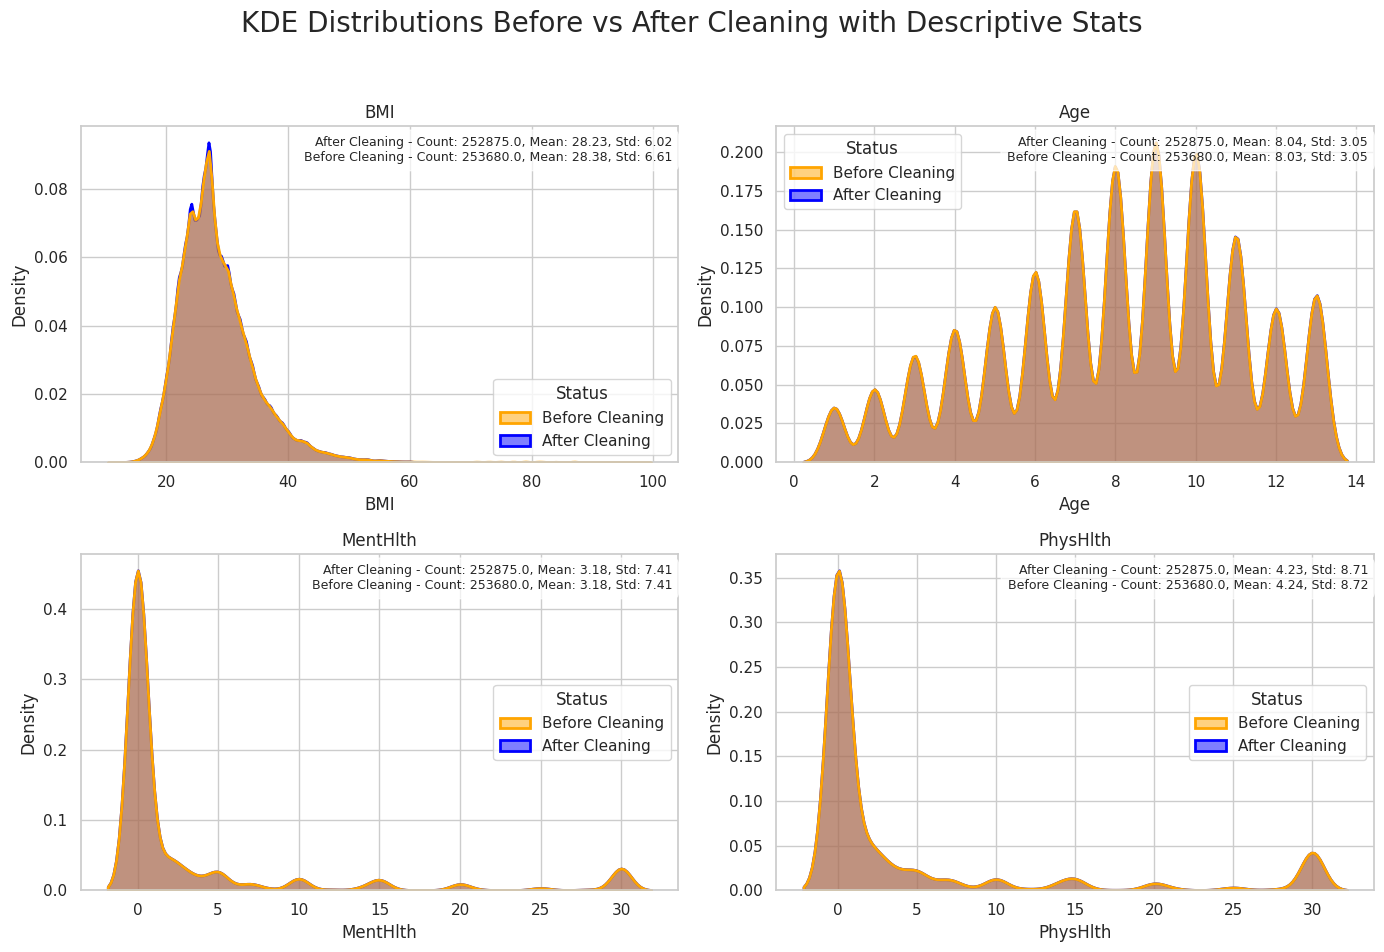

In [29]:
#KDE
sns.set(style='whitegrid')
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()
fig.suptitle('KDE Distributions Before vs After Cleaning with Descriptive Stats', fontsize=20)

for i, feature in enumerate(features):
    ax = axes[i]
    sns.kdeplot(data=df_combined, x=feature, hue='Status', fill=True, common_norm=False,
                palette=['orange', 'blue'], alpha=0.5, linewidth=2, ax=ax)
    ax.set_title(feature)
    ax.grid(True)
    stats = df_combined.groupby('Status')[feature].agg(['count', 'mean', 'std']).round(2)
    stats_text = "\n".join(
        [f"{status} - Count: {row['count']}, Mean: {row['mean']}, Std: {row['std']}"
         for status, row in stats.iterrows()])
    ax.text(0.99, 0.97, stats_text, transform=ax.transAxes,
            verticalalignment='top', horizontalalignment='right',
            fontsize=9, bbox=dict(boxstyle='round,pad=0.5', facecolor='white', alpha=0.7))
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


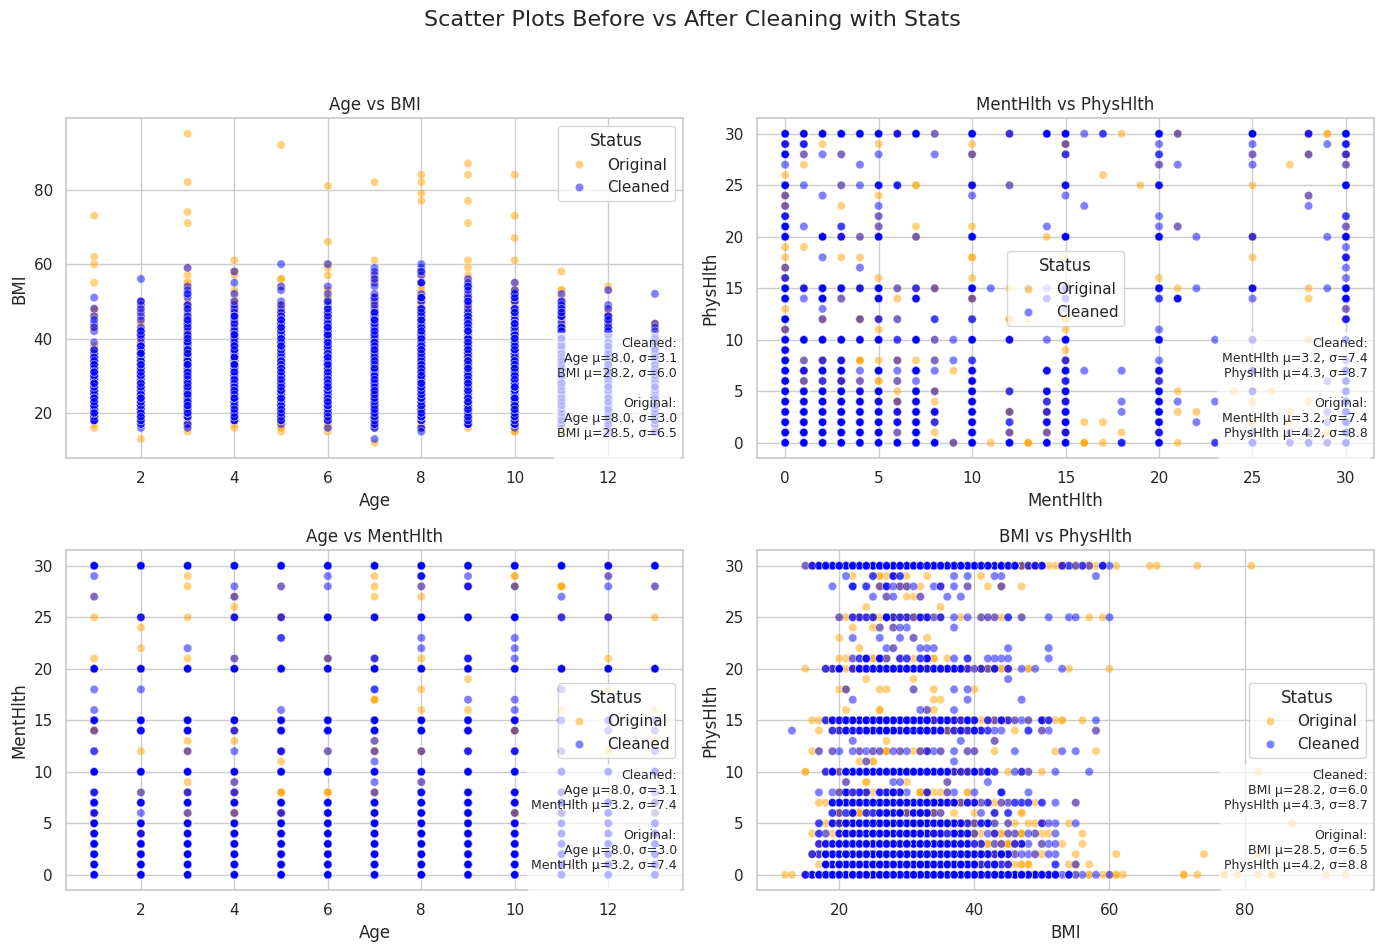

In [30]:
#Scatter Plot
df_before_sampled = df_before_cleaning.sample(n=min(sample_size, len(df_before_cleaning)), random_state=42).copy()
df_after_sampled = df_after_cleaning.sample(n=min(sample_size, len(df_after_cleaning)), random_state=42).copy()
df_before_sampled['Status'] = 'Original'
df_after_sampled['Status'] = 'Cleaned'
df_combined = pd.concat([df_before_sampled, df_after_sampled])
feature_pairs = [('Age', 'BMI'), ('MentHlth', 'PhysHlth'), ('Age', 'MentHlth'), ('BMI', 'PhysHlth')]
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()
fig.suptitle('Scatter Plots Before vs After Cleaning with Stats', fontsize=16)
def annotate_scatter(ax, df, x, y):
    grouped = df.groupby('Status')[[x, y]].agg(['mean', 'std', 'count']).round(1)
    lines = []
    for status in grouped.index:
        stats = grouped.loc[status]
        lines.append(
            f"{status}:\n"
            f"{x} μ={stats[x]['mean']}, σ={stats[x]['std']}\n"
            f"{y} μ={stats[y]['mean']}, σ={stats[y]['std']}\n")
    ax.text(0.99, 0.01, "\n".join(lines), transform=ax.transAxes,
            ha='right', va='bottom', fontsize=9,
            bbox=dict(boxstyle="round", facecolor="white", alpha=0.7))
for i, (x, y) in enumerate(feature_pairs):
    sns.scatterplot(data=df_combined, x=x, y=y, hue='Status',
                    alpha=0.5, palette={'Original': 'orange', 'Cleaned': 'blue'}, ax=axes[i])
    axes[i].set_title(f"{x} vs {y}")
    annotate_scatter(axes[i], df_combined, x, y)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


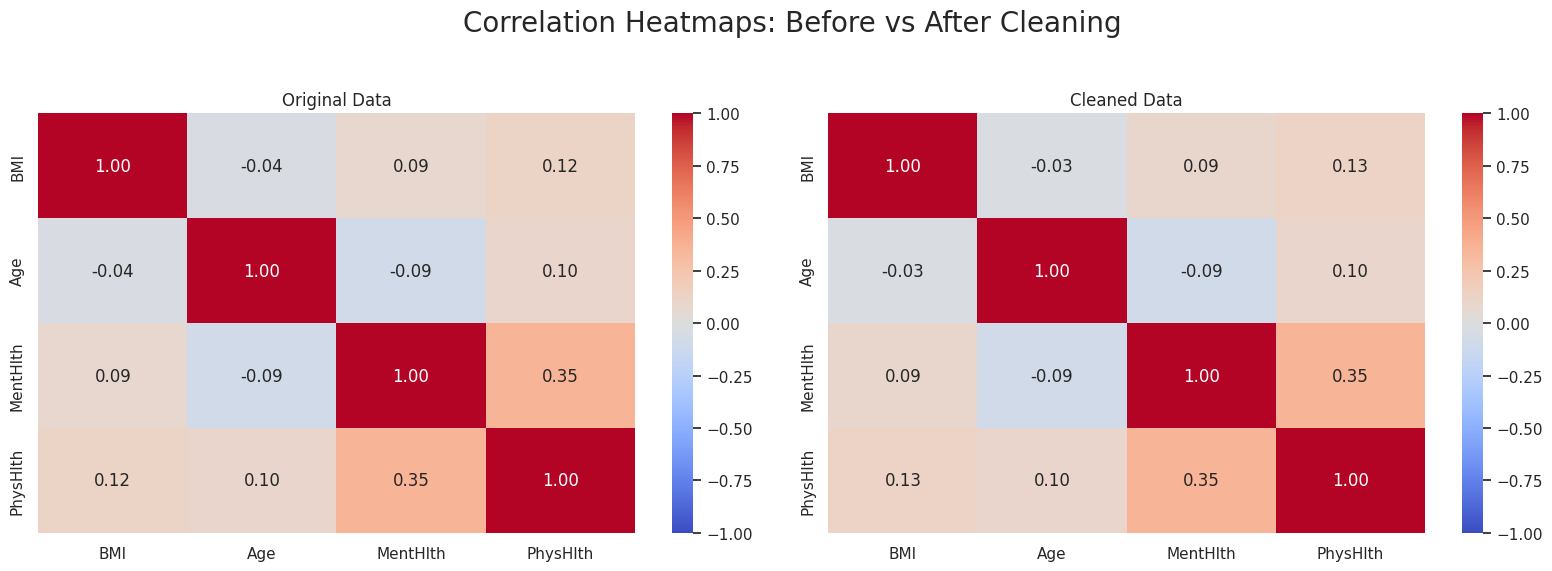

In [32]:
#Heatmaps
features = ['BMI', 'Age', 'MentHlth', 'PhysHlth']
corr_original = df_before_cleaning[features].corr()
corr_cleaned = df_after_cleaning[features].corr()
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Correlation Heatmaps: Before vs After Cleaning', fontsize=20)
sns.heatmap(corr_original, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1, ax=axes[0])
axes[0].set_title("Original Data")
sns.heatmap(corr_cleaned, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1, ax=axes[1])
axes[1].set_title("Cleaned Data")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()



<ipython-input-46-43d65565b5ee>:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dist_data = df_combined.groupby(['Status', binned]).size().reset_index(name='Count')
<ipython-input-46-43d65565b5ee>:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dist_data = df_combined.groupby(['Status', binned]).size().reset_index(name='Count')


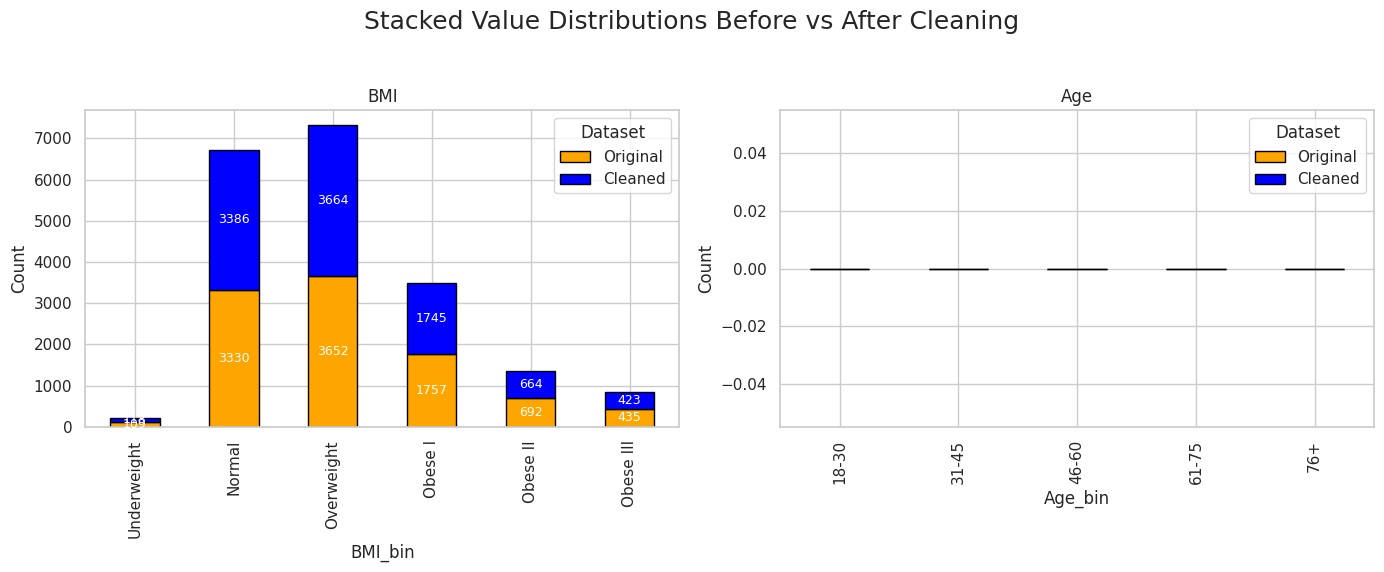

In [46]:
#Bar chart
df_combined['BMI_bin'] = pd.cut(df_combined['BMI'], bins=[0, 18.5, 25, 30, 35, 40, 60],
                                labels=['Underweight', 'Normal', 'Overweight', 'Obese I', 'Obese II', 'Obese III'])
df_combined['Age_bin'] = pd.cut(df_combined['Age'], bins=[17, 30, 45, 60, 75, 100],
                                labels=['18-30', '31-45', '46-60', '61-75', '76+'])
binned_features = ['BMI_bin', 'Age_bin']
fig, axes = plt.subplots(1, len(binned_features), figsize=(14, 6))
fig.suptitle('Stacked Value Distributions Before vs After Cleaning', fontsize=18)

for i, binned in enumerate(binned_features):
    dist_data = df_combined.groupby(['Status', binned]).size().reset_index(name='Count')
    pivot_data = dist_data.pivot(index=binned, columns='Status', values='Count').fillna(0)
    ax = axes[i]
    plot = pivot_data[['Original', 'Cleaned']].plot(
        kind='bar', stacked=True, ax=ax, color=['orange', 'blue'], edgecolor='black')
    ax.set_title(binned.replace("_bin", ""))
    ax.set_ylabel("Count")
    ax.legend(title="Dataset")
    for container in plot.containers:
        for bar in container:
            height = bar.get_height()
            if height > 0:
                plot.annotate(f'{int(height)}',
                              xy=(bar.get_x() + bar.get_width() / 2, bar.get_y() + height / 2),
                              ha='center', va='center', fontsize=9, color='white')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

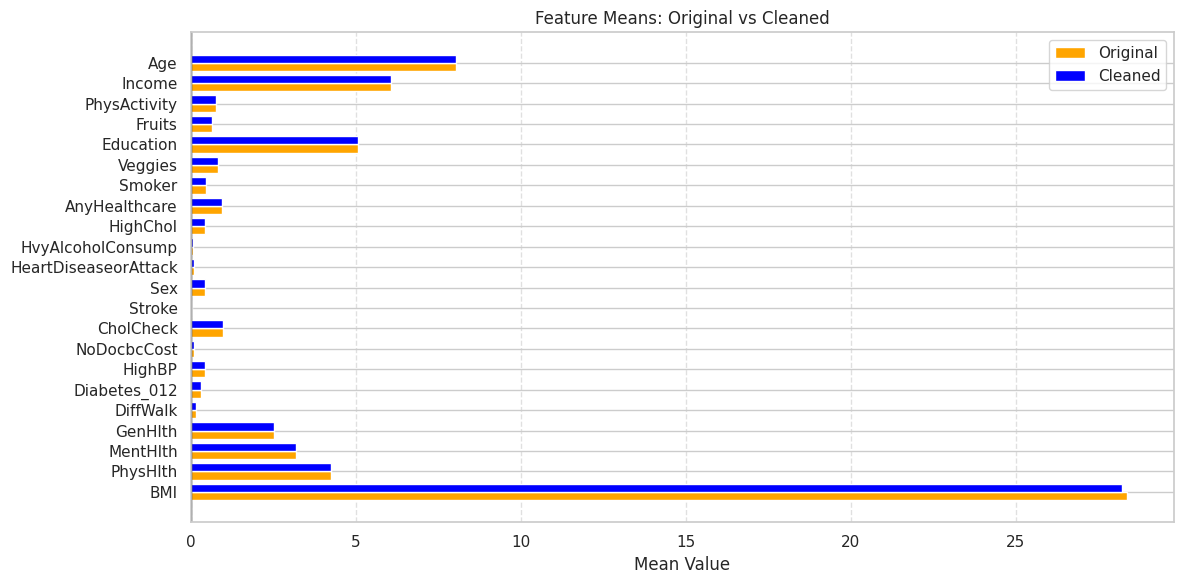

In [36]:
#mean - feature
numeric_cols = df_before_cleaning.select_dtypes(include='number').columns
numeric_cols = [col for col in numeric_cols if col != 'Status']
mean_original = df_before_cleaning[numeric_cols].mean()
mean_cleaned = df_after_cleaning[numeric_cols].mean()
mean_diff = mean_cleaned - mean_original
sorted_features = mean_diff.sort_values().index
bar_width = 0.4
x = np.arange(len(sorted_features))

plt.figure(figsize=(12, 6))
plt.barh(x - bar_width/2, mean_original[sorted_features], height=bar_width, label='Original', color='orange')
plt.barh(x + bar_width/2, mean_cleaned[sorted_features], height=bar_width, label='Cleaned', color='blue')

plt.yticks(ticks=x, labels=sorted_features)
plt.axvline(0, color='black', linewidth=1)
plt.xlabel('Mean Value')
plt.title('Feature Means: Original vs Cleaned')
plt.legend()
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()



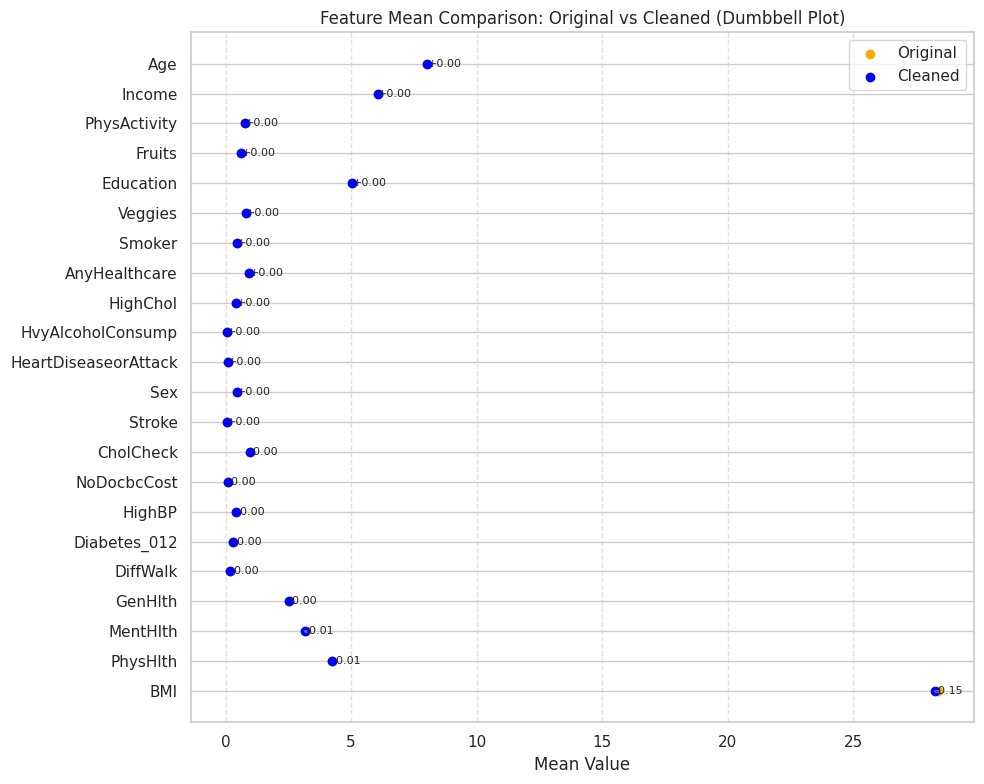

In [38]:
#dumbbell
numeric_cols = df_before_cleaning.select_dtypes(include='number').columns
numeric_cols = [col for col in numeric_cols if col != 'Status']
mean_orig = df_before_cleaning[numeric_cols].mean()
mean_clean = df_after_cleaning[numeric_cols].mean()
df_means = pd.DataFrame({
    'Feature': numeric_cols,
    'Original': mean_orig.values,
    'Cleaned': mean_clean.values})
df_means['Diff'] = df_means['Cleaned'] - df_means['Original']
df_means = df_means.sort_values('Diff')

plt.figure(figsize=(10, 8))
for i, row in df_means.iterrows():
    plt.plot([row['Original'], row['Cleaned']], [row['Feature'], row['Feature']], color='gray', linewidth=2)
    plt.scatter(row['Original'], row['Feature'], color='orange', label='Original' if i == 0 else "")
    plt.scatter(row['Cleaned'], row['Feature'], color='blue', label='Cleaned' if i == 0 else "")
    plt.text(row['Cleaned'] + 0.01, row['Feature'], f"{row['Diff']:+.2f}", va='center', fontsize=8)

plt.title('Feature Mean Comparison: Original vs Cleaned (Dumbbell Plot)')
plt.xlabel('Mean Value')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

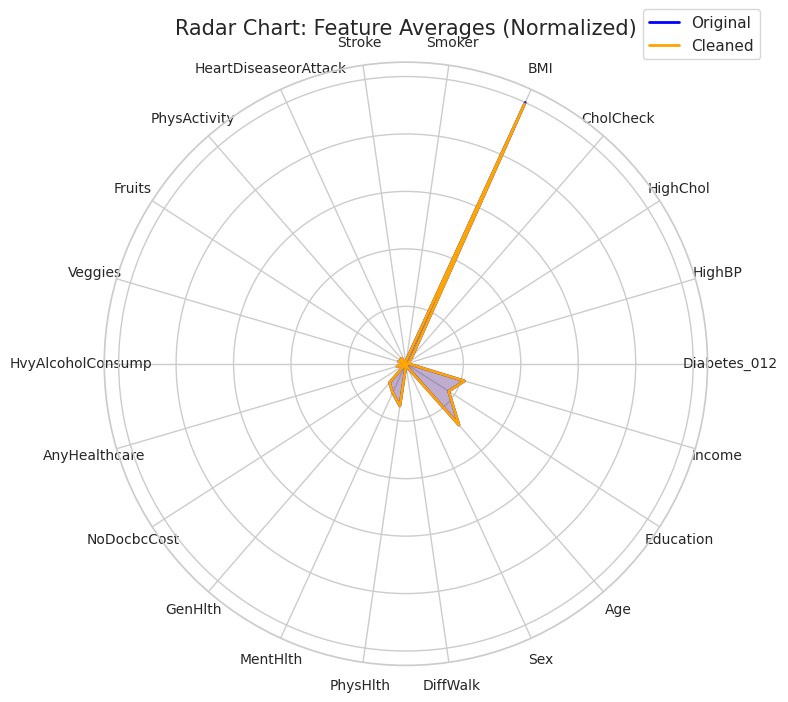

In [42]:
#radar
numeric_cols = df_before_cleaning.select_dtypes(include='number').columns.tolist()
means_orig = df_before_cleaning[numeric_cols].mean()
means_clean = df_after_cleaning[numeric_cols].mean()
means_orig_scaled = (means_orig - means_orig.min()) / (means_orig.max() - means_orig.min())
means_clean_scaled = (means_clean - means_orig.min()) / (means_orig.max() - means_orig.min())
labels = numeric_cols
num_vars = len(labels)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
values_orig = means_orig_scaled.tolist()
values_clean = means_clean_scaled.tolist()
values_orig += values_orig[:1]
values_clean += values_clean[:1]
angles += angles[:1]

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
ax.plot(angles, values_orig, label='Original', color='blue', linewidth=2)
ax.fill(angles, values_orig, color='orange', alpha=0.25)
ax.plot(angles, values_clean, label='Cleaned', color='orange', linewidth=2)
ax.fill(angles, values_clean, color='blue', alpha=0.25)
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels, fontsize=10)
ax.set_yticklabels([])
ax.set_title("Radar Chart: Feature Averages (Normalized)", fontsize=15, pad=20)
ax.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))

plt.tight_layout()
plt.show()


<ipython-input-44-169e59035ffe>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=df_combined, x='Status', y=feature, jitter=True, alpha=0.4,
<ipython-input-44-169e59035ffe>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=df_combined, x='Status', y=feature, jitter=True, alpha=0.4,
<ipython-input-44-169e59035ffe>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=df_combined, x='Status', y=feature, jitter=True, alpha=0.4,
<ipython-input-44-169e59035ffe>:22: FutureWarning: 

Passing `palette` without assigning `hue` is de

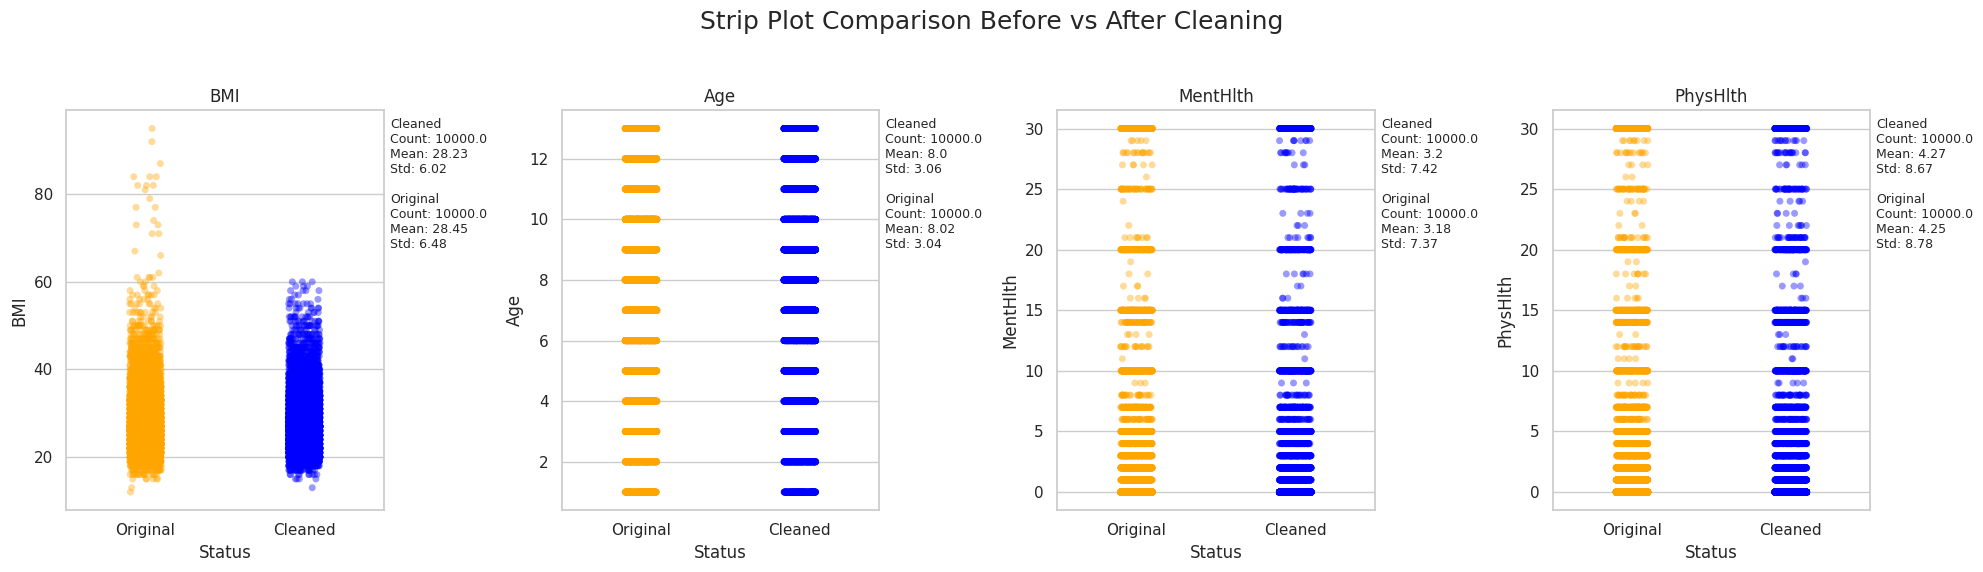

In [44]:
#strip plot
df_before_sampled = df_before_cleaning.sample(n=min(sample_size, len(df_before_cleaning)), random_state=42).copy()
df_after_sampled = df_after_cleaning.sample(n=min(sample_size, len(df_after_cleaning)), random_state=42).copy()
df_before_sampled['Status'] = 'Original'
df_after_sampled['Status'] = 'Cleaned'
df_combined = pd.concat([df_before_sampled, df_after_sampled])
features = ['BMI', 'Age', 'MentHlth', 'PhysHlth']
fig, axes = plt.subplots(1, len(features), figsize=(5 * len(features), 6), sharey=False)
fig.suptitle('Strip Plot Comparison Before vs After Cleaning', fontsize=18)

for i, feature in enumerate(features):
    ax = axes[i]
    sns.stripplot(data=df_combined, x='Status', y=feature, jitter=True, alpha=0.4,
                  palette={'Original': 'orange', 'Cleaned': 'blue'}, ax=ax)
    ax.set_title(feature)
    stats = df_combined.groupby('Status')[feature].agg(['count', 'mean', 'std']).round(2)
    text = ""
    for label in stats.index:
        row = stats.loc[label]
        text += f"{label}\nCount: {row['count']}\nMean: {row['mean']}\nStd: {row['std']}\n\n"
    ax.text(1.02, 0.98, text.strip(), transform=ax.transAxes,
            verticalalignment='top', horizontalalignment='left',
            fontsize=9, bbox=dict(boxstyle="round", facecolor="white", alpha=0.7))

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

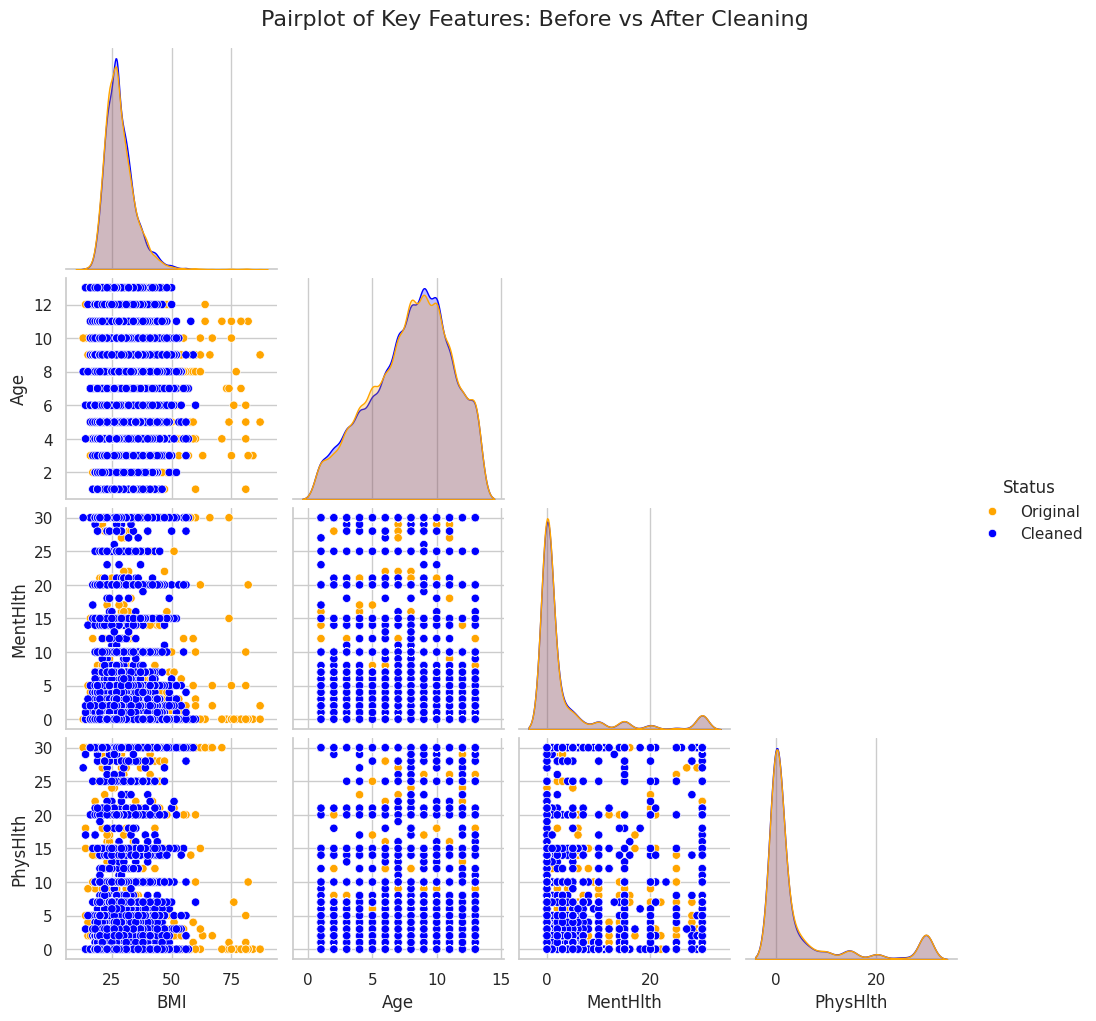

In [47]:
#Pairplot
df_before_sampled = df_before_cleaning.sample(n=min(sample_size, len(df_before_cleaning)), random_state=1).copy()
df_after_sampled = df_after_cleaning.sample(n=min(sample_size, len(df_after_cleaning)), random_state=1).copy()
df_before_sampled['Status'] = 'Original'
df_after_sampled['Status'] = 'Cleaned'
df_pairplot = pd.concat([df_before_sampled, df_after_sampled])
plot_features = ['BMI', 'Age', 'MentHlth', 'PhysHlth']
sns.pairplot(df_pairplot[plot_features + ['Status']],
             hue='Status',
             palette={'Original': 'orange', 'Cleaned': 'blue'},
             diag_kind='kde',
             corner=True)

plt.suptitle("Pairplot of Key Features: Before vs After Cleaning", y=1.02, fontsize=16)
plt.show()

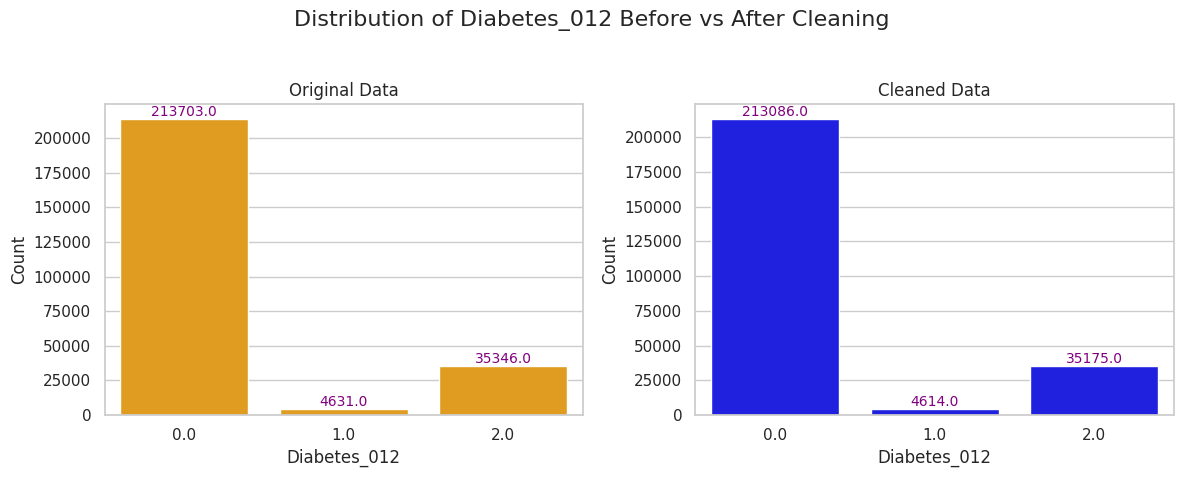

In [50]:
#Data Distribition
possible_targets = ['Diabetes_binary', 'Diabetes_012']
target_col = next((col for col in df_before_cleaning.columns if col in possible_targets), None)

if target_col is None:
    raise ValueError("Could not find a diabetes target column in your DataFrame.")
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
fig.suptitle(f"Distribution of {target_col} Before vs After Cleaning", fontsize=16)
sns.countplot(x=target_col, data=df_before_cleaning, ax=axes[0], color='orange')
axes[0].set_title("Original Data")
axes[0].set_xlabel(target_col)
axes[0].set_ylabel("Count")

for p in axes[0].patches:
    height = p.get_height()
    axes[0].annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                     ha='center', va='bottom', fontsize=10, color='purple')
sns.countplot(x=target_col, data=df_after_cleaning, ax=axes[1], color='blue')
axes[1].set_title("Cleaned Data")
axes[1].set_xlabel(target_col)
axes[1].set_ylabel("Count")

for p in axes[1].patches:
    height = p.get_height()
    axes[1].annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                     ha='center', va='bottom', fontsize=10, color='purple')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
